# FUNCTIONS

In the next cells we define the functions.
1. read_csv(file_path): 
2. transform(dt): transform labels to a numeric tipo for AL
3. Plot functions


In [16]:
# This cell contains a function to read datasets
# from CSV files. The function will return an object
# with the same characteristics as those returned
# by the functions from the SciKit-Learn library.

import pandas as pd
from sklearn.utils import Bunch

def read_csv(file_path):

  csv_data = pd.read_csv(file_path)

  output_dataset = Bunch(data = csv_data.iloc[:, :-2].values,
                         target = csv_data.iloc[:, -2].values,
                         feature_names = csv_data.columns[:-2].values,
                         target_names = csv_data.dropna().iloc[:, -1].values)

  return output_dataset

In [17]:
# This cell contains a function to transform the attributes
# and labels of the dataset to numeric data types. In this way,
# the dataset can be used to train an ML model.
#
# Example: transformed_dataset = transform(dataset)
#

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def transform(dt):

    # Transform non-numeric attributes using OrdinalEncoder
    encoder = OrdinalEncoder()
    dt.data = encoder.fit_transform(dt.data)

    # Transform non-numeric labels using LabelEncoder
    encoder = LabelEncoder()
    dt.target = encoder.fit_transform(dt.target)

    return dt

In [18]:
# Function to plot the evaluation accuracy curve

import numpy as np
import matplotlib.pyplot as plt

def Graficar_curva_precision(test_accuracy,min_samples_split_range,min_samples_leaf_range):
    # Crear una matriz de precisión en evaluación para la representación gráfica
    eval_accuracy_matrix = np.array(test_accuracy).reshape(len(min_samples_split_range), len(min_samples_leaf_range))

    # Encontrar las coordenadas (índices) del máximo valor de precisión en evaluación
    best_idx = np.unravel_index(np.argmax(eval_accuracy_matrix), eval_accuracy_matrix.shape)

    # Obtener los valores óptimos de min_samples_split y min_samples_leaf
    optimal_min_samples_split = min_samples_split_range[best_idx[0]]
    optimal_min_samples_leaf = min_samples_leaf_range[best_idx[1]]

    # Graficar la curva de precisión en evaluación
    plt.figure(figsize=(12, 8))
    plt.imshow(eval_accuracy_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('min_samples_split')
    plt.colorbar(label='Accuracy')
    plt.xticks(np.arange(len(min_samples_leaf_range)), min_samples_leaf_range, rotation=45)
    plt.yticks(np.arange(len(min_samples_split_range)), min_samples_split_range)
    plt.title('Evaluation Accuracy Curve')
    plt.plot(best_idx[1], best_idx[0], 'ro')  # Resaltar el valor óptimo
    plt.show()

    # Imprimir los valores óptimos encontrados
    print("Optimal value of min_samples_split:", optimal_min_samples_split)
    print("Optimal value of min_samples_leaf:", optimal_min_samples_leaf)


# DATA READING

1. Read data from "credit_data.csv"
2. Transform data with the transform(dt) function
3. Print information to analize dataset

In [19]:
# Utilize the functions to read the csv file and transform the data

dataset = read_csv("credit_data.csv")
dataset_transformed = transform(dataset)


In [20]:
df = pd.read_csv("credit_data.csv")
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [21]:
# Print information to analize dataset

print("The entry attributes are: {}.".format(dataset_transformed.feature_names))
print("The classes that we will try to predict are: {}.".format(dataset_transformed.target_names))
print("The format of the data matrix is {}.".format(dataset_transformed.data.shape))
print("The format of the label matrix is: {}.".format(dataset_transformed.target.shape))



The entry attributes are: ['checking_status' 'duration' 'credit_history' 'purpose' 'credit_amount'
 'savings_status' 'employment' 'installment_commitment' 'personal_status'
 'other_parties' 'residence_since' 'property_magnitude' 'age'
 'other_payment_plans' 'housing' 'existing_credits' 'job' 'num_dependents'
 'own_telephone' 'foreign_worker'].
The classes that we will try to predict are: ['good' 'bad'].
The format of the data matrix is (1000, 20).
The format of the label matrix is: (1000,).


# SPLIT DATA
The train_test_split function from the Scikit-Learn library is used to split the dataset. The test set should contain 10% of the total samples in the dataset.

The random_state parameter is set to 0 to ensure that the results are reproducible. This means that if you run the same code with the same random_state seed, you will get the same results every time you run the code.

In [22]:
# SPLIT DATA
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(dataset_transformed['data'],
                                                                    dataset_transformed['target'],
                                                                    test_size = 0.1,
                                                                    random_state = 0)

print(f"Now, the training set has {format(data_train.shape[0])} samples and the evaluation set has {data_test.shape[0]} samples.")

Now, the training set has 900 samples and the evaluation set has 100 samples.


## 2A) Train the tree with default parameters
Train a decision tree on the training set using the default parameters of the tree. Use the accuracy metric to measure the trained model on both the training and evaluation sets. What effects do you observe on this tree? How do you explain them?


In [23]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear un modelo de árbol de decisión (parametros por defecto)
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(data_train, target_train)

# Predecir las etiquetas en el conjunto de entrenamiento y evaluación
target_train_predict = tree_classifier.predict(data_train)
target_test_predict = tree_classifier.predict(data_test)

# Calcular la precisión (accuracy) en el conjunto de entrenamiento y evaluación
accuracy_train = accuracy_score(target_train, target_train_predict)
accuracy_test = accuracy_score(target_test, target_test_predict)

print("Train set accuracy:", accuracy_train)
print("Evaluation set accuracy:", accuracy_test)


Train set accuracy: 1.0
Evaluation set accuracy: 0.7


### CONCLUSION

As we can see, the accuracy on the training set is 1, while the accuracy on the evaluation set is 0.7, a clear example of overfitting. This means that the model has learned the training data too well, instead of generalizing patterns. As a result, when evaluated with test data it hasn't seen before, performance decreases.

To mitigate this error, some hyperparameters will be specified in the creation of the tree, with the aim of preventing it from growing until it becomes overtrained.

## 2B) Train tree with variations
Vary the following tree parameters within the specified range of values and plot the
accuracy curve on the training and evaluation set for each case:

● min_samples_split: between 2 and 50

● min_samples_leaf: between 1 and 50

**min_samples_split**: Integer specifying the minimum number of samples required to split a node into two new nodes and/or leaves.

**min_samples_leaf**: Integer specifying the minimum number of samples required to form a leaf node. The split of a node into leaves will only be considered if there are at least min_samples_leaf training examples in each of the resulting branches.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges of values for min_samples_split and min_samples_leaf
min_samples_split_range = np.arange(2, 51)
min_samples_leaf_range = np.arange(1, 51)

# Inicialize lists to store training and evaluation accuracy
train_accuracy = []
test_accuracy = []

# Inicialize variables to store maximum accuracy and optimal values of min_samples_split and min_samples_leaf
max_accuracy = 0
optimal_min_samples_split = None
optimal_min_samples_leaf = None

# Iterate over the values of min_samples_split and min_samples_leaf
for min_samples_split in min_samples_split_range:
    for min_samples_leaf in min_samples_leaf_range:
        # Crear y entrenar un árbol de decisión con los valores actuales de parámetros
        tree_classifier = DecisionTreeClassifier( random_state=0,
                                                  min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf)
        tree_classifier.fit(data_train, target_train)

        # Calculate training and evaluation accuracy
        target_train_predict = tree_classifier.predict(data_train)
        target_test_predict = tree_classifier.predict(data_test)
        accuracy_train = accuracy_score(target_train, target_train_predict)
        accuracy_test = accuracy_score(target_test, target_test_predict)

        # Append the accuracies to the lists
        train_accuracy.append(accuracy_train)
        test_accuracy.append(accuracy_test)

        # Update the variables if a higher accuracy is found
        if accuracy_test > max_accuracy:
             max_accuracy = accuracy_test
             optimal_min_samples_split = min_samples_split
             optimal_min_samples_leaf = min_samples_leaf

In [26]:
print("Training and evaluation accuracies have been calculated for all parameter combinations.")
print(f"The max_accuracy is: {max_accuracy} and is obtained with min_samples_split = {optimal_min_samples_split} and min_samples_leaf = {optimal_min_samples_leaf}")

Training and evaluation accuracies have been calculated for all parameter combinations.
The max_accuracy is: 0.79 and is obtained with min_samples_split = 2 and min_samples_leaf = 36


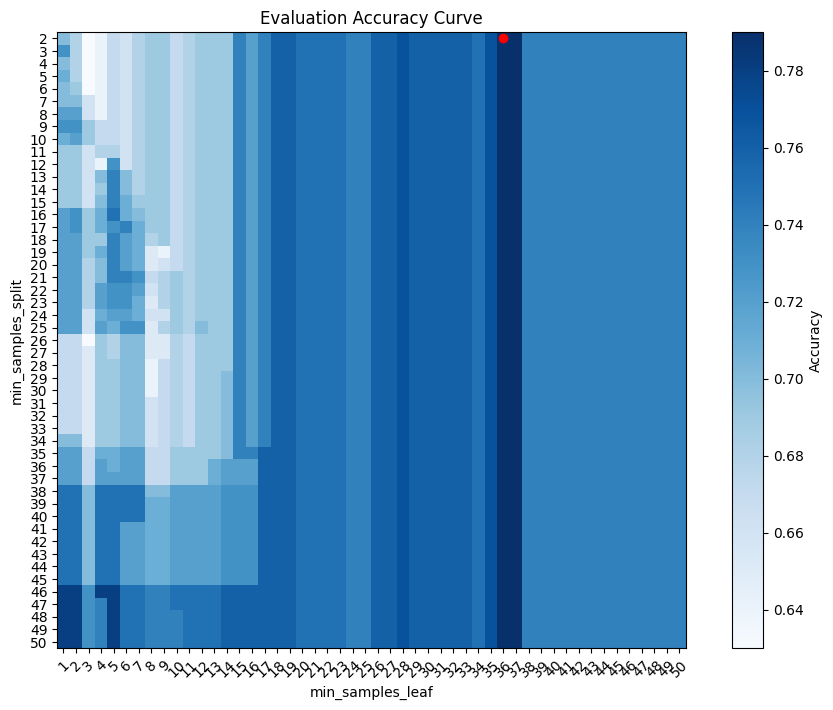

Optimal value of min_samples_split: 2
Optimal value of min_samples_leaf: 36


In [27]:
Graficar_curva_precision(test_accuracy,min_samples_split_range,min_samples_leaf_range)

In [28]:
# Train the new tree using both

tree_classifier = DecisionTreeClassifier(random_state=0,
                                         min_samples_split=optimal_min_samples_split,
                                          min_samples_leaf=optimal_min_samples_leaf)
tree_classifier.fit(data_train, target_train)

# Predict the labels in the training and evaluation set
target_train_predict = tree_classifier.predict(data_train)
target_test_predict = tree_classifier.predict(data_test)

# Calculate the accuracy in the training and evaluation set
accuracy_train = accuracy_score(target_train, target_train_predict)
accuracy_test = accuracy_score(target_test, target_test_predict)

print("Nueva precisión en el conjunto de entrenamiento:", round(accuracy_train,3))
print("Nueva precisión en el conjunto de evaluación:", round(accuracy_test,3))

Nueva precisión en el conjunto de entrenamiento: 0.759
Nueva precisión en el conjunto de evaluación: 0.79


Now the obtained values are:

New accuracy on the training set: 0.759

New accuracy on the evaluation set: 0.79

We can see that these results are better, because the decision tree generalizes the data more and similar accuracies are obtained on both sets. We have eliminated the previous overfitting.

## 2C) Prune Tree

For the model trained in point 2.a, perform layer-wise pruning from levels 1 to 15 and plot how the accuracy value varies on the training and evaluation sets for each pruning level. Which level of pruning do you consider optimal and why?

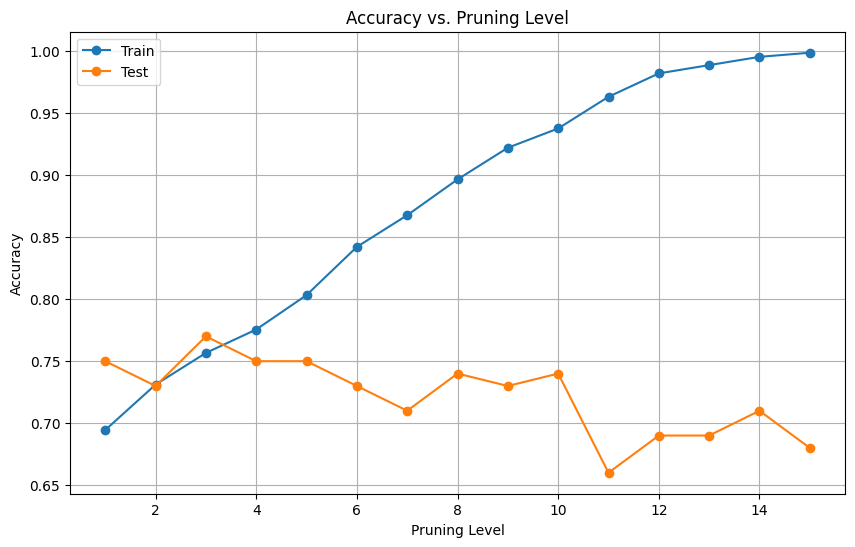

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Define the range for pruning levels (1 to 15)
rango = range(1,16)

# Lists to store training and evaluation accuracies
train_accuracy = []
eval_accuracy = []

# Iterate over pruning levels from 1 to 15
for max_depth in rango:
    # Create and train a decision tree with the current pruning level
    tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    tree_classifier.fit(data_train, target_train)

    # Predict the labels in the training and evaluation set
    target_train_predict = tree_classifier.predict(data_train)
    target_eval_predict = tree_classifier.predict(data_test)

    # Calculate the accuracy in training and evaluation set
    accuracy_train = accuracy_score(target_train, target_train_predict)
    accuracy_eval = accuracy_score(target_test, target_eval_predict)

    # Append accuracies to the lists
    train_accuracy.append(accuracy_train)
    eval_accuracy.append(accuracy_eval)

# Plot how accuracy varies with pruning level
plt.figure(figsize=(10, 6))
plt.plot(rango, train_accuracy, marker='o', label='Train')
plt.plot(rango, eval_accuracy, marker='o', label='Test')
plt.xlabel('Pruning Level')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Pruning Level')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
max_eval_accuracy = max(eval_accuracy)
indice_max_eval_accuracy = eval_accuracy.index(max_eval_accuracy)
train_accuracy_at_max_eval_accuracy = round(train_accuracy[indice_max_eval_accuracy+1],3)
print(f"Optimal Accuracy in test set: {max_eval_accuracy}")
print(f"Accuracy in training set for that depth: {train_accuracy_at_max_eval_accuracy}")

Optimal Accuracy in test set: 0.77
Accuracy in training set for that depth: 0.776


max_depth is the maximum depth of the tree. By default, this value is "None", so the tree will expand as much as it deems necessary.

We see that if we set a high max_depth, the training set accuracy has a large discrepancy compared to the test set accuracy. This indicates that the tree is overfitting.

The optimal value for max_depth in this case is 3. At this point, the evaluation set reaches its maximum value and there is not a significant difference with the accuracy of the training set.



---

